# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.shape

(50000, 14)

In [4]:
df.size

700000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Data Cleaning

In [10]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

- No Null Values

In [11]:
for i in df.columns:
    print(i,':',sep='')
    print(df[i].value_counts(normalize=True))
    print()

num_passengers:
1    0.62704
2    0.25608
3    0.05882
4    0.03568
5    0.01122
6    0.00578
7    0.00228
8    0.00178
9    0.00132
Name: num_passengers, dtype: float64

sales_channel:
Internet    0.88764
Mobile      0.11236
Name: sales_channel, dtype: float64

trip_type:
RoundTrip     0.98994
OneWay        0.00774
CircleTrip    0.00232
Name: trip_type, dtype: float64

purchase_lead:
1      0.01370
2      0.01340
6      0.01306
7      0.01276
5      0.01230
        ...   
641    0.00002
471    0.00002
614    0.00002
463    0.00002
867    0.00002
Name: purchase_lead, Length: 470, dtype: float64

length_of_stay:
6      0.15514
5      0.14572
4      0.11310
3      0.05678
17     0.03698
        ...   
226    0.00002
778    0.00002
610    0.00002
308    0.00002
356    0.00002
Name: length_of_stay, Length: 335, dtype: float64

flight_hour:
8     0.06330
12    0.06326
9     0.06264
7     0.06252
11    0.06220
13    0.06202
10    0.06170
6     0.06100
5     0.05702
4     0.05686
14    0.0566

- No missing values

In [12]:
df_n = df.select_dtypes(np.number).columns
df_c = df.select_dtypes('object').columns

print(df_n)
print(df_c)

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

### Univariate Analysis

num_passengers:


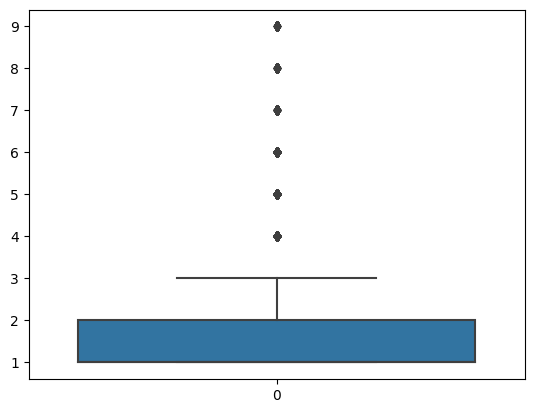


purchase_lead:


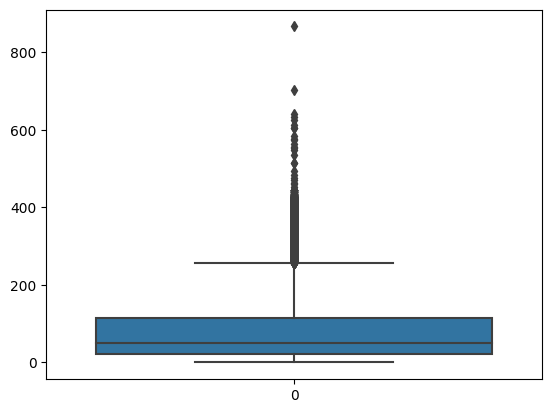


length_of_stay:


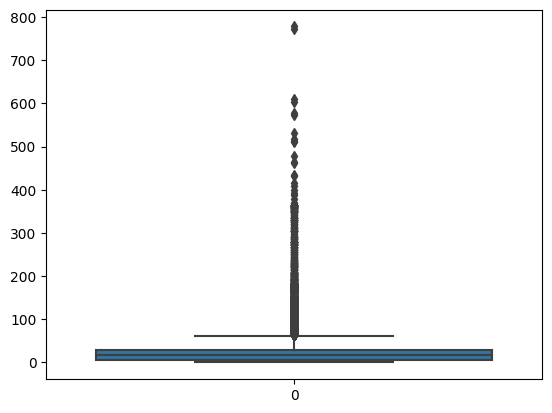


flight_hour:


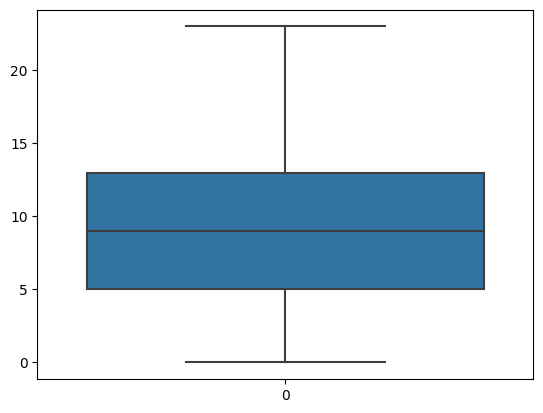


flight_day:


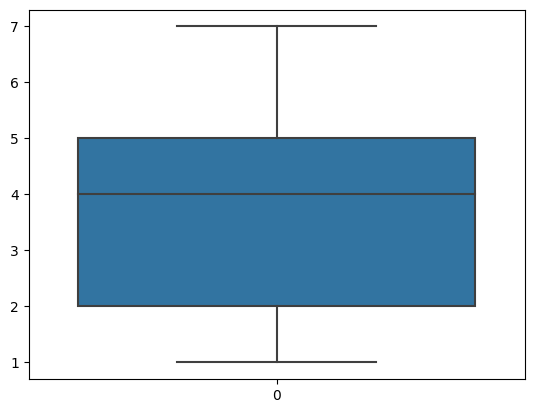


wants_extra_baggage:


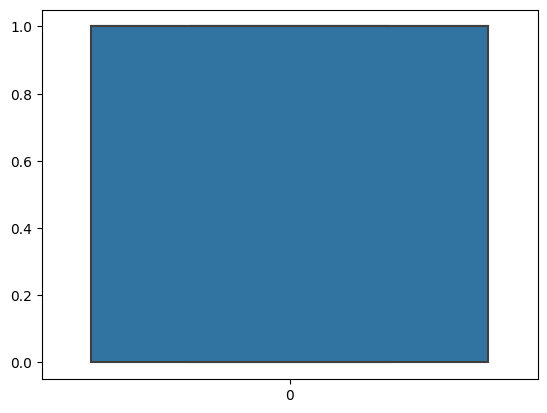


wants_preferred_seat:


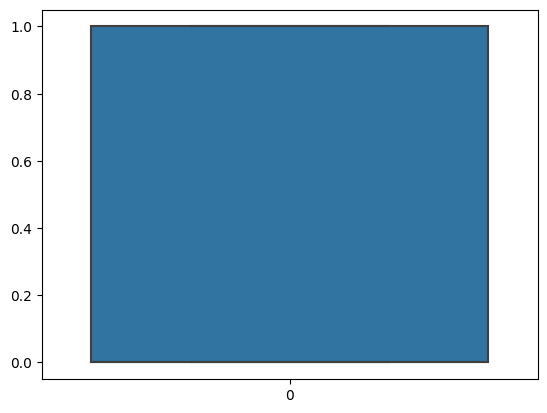


wants_in_flight_meals:


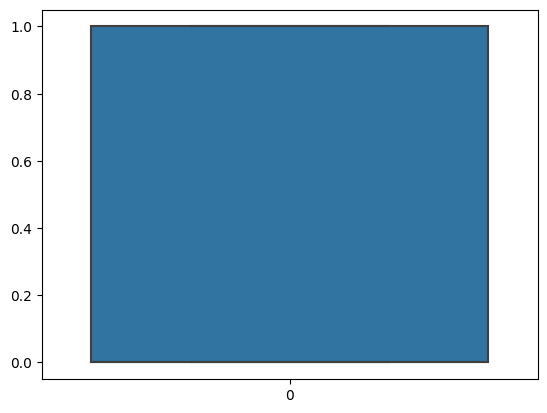


flight_duration:


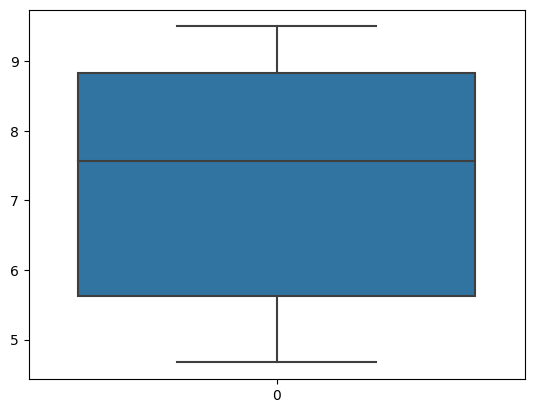


booking_complete:


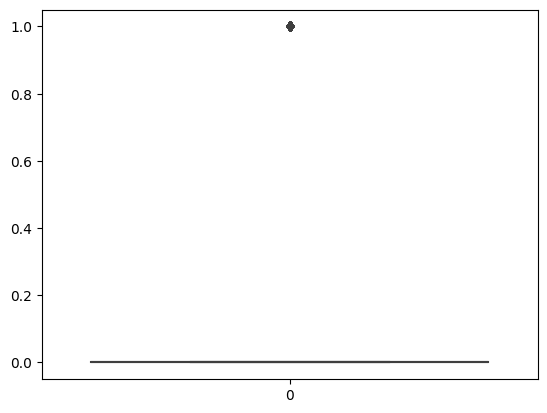

In [14]:
for i in df_n:
    print(i,':',sep='')
    sns.boxplot(df[i])
    plt.show()
    print()

- Columns num_passengers, purchase_lead, length_of_stay seem to have outliers but in this situation they will not be treated and will be retained

num_passengers:
2.690908394425359


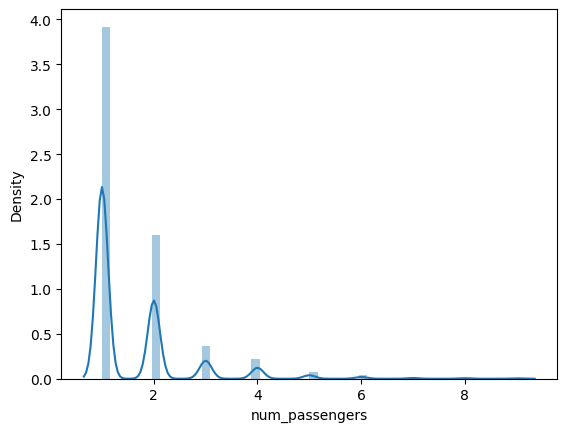


purchase_lead:
1.6530353389634522


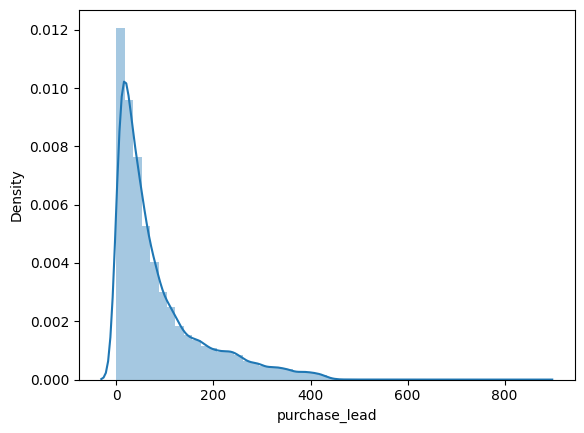


length_of_stay:
5.27474259801301


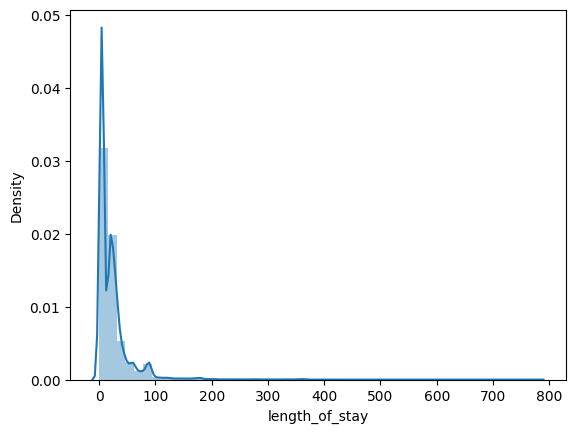


flight_hour:
0.3966231863209075


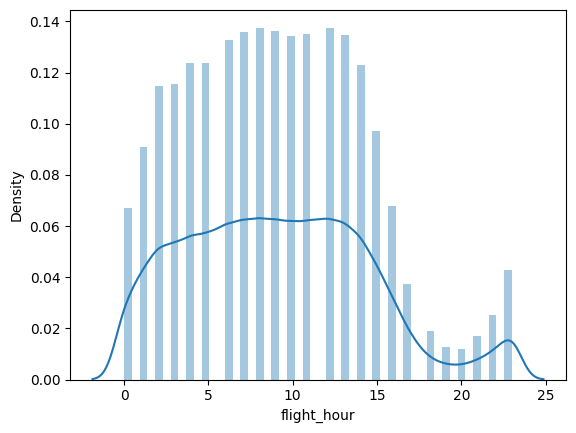


flight_day:
0.13462633963393505


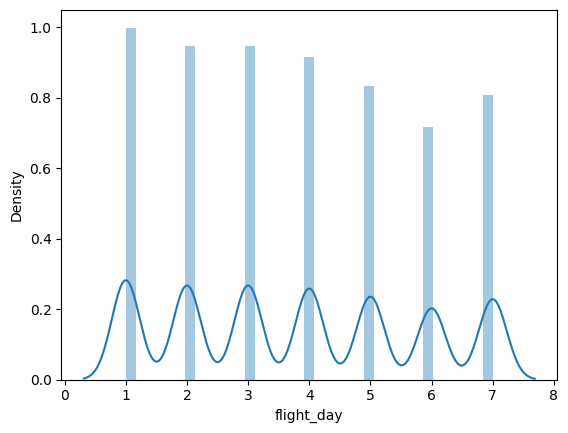


wants_extra_baggage:
-0.717239323828421


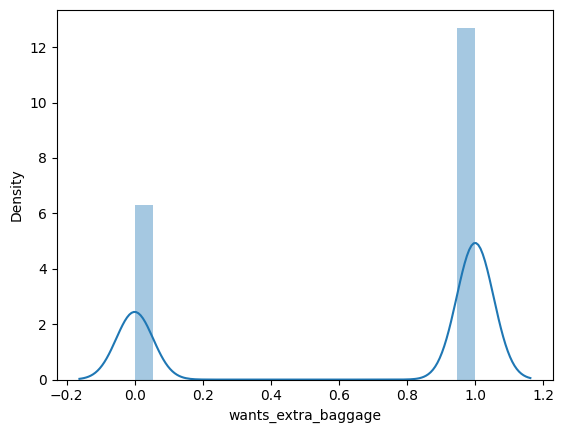


wants_preferred_seat:
0.888762321443176


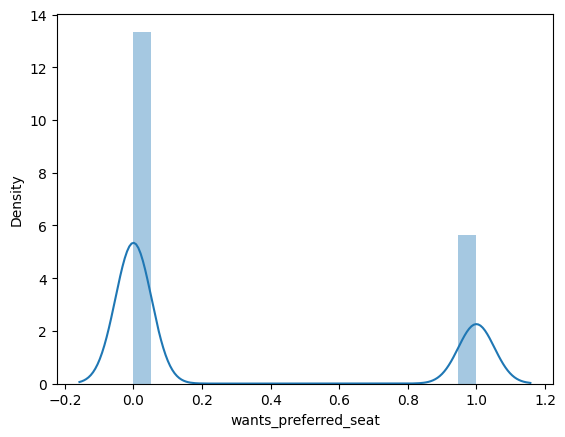


wants_in_flight_meals:
0.29459326971599914


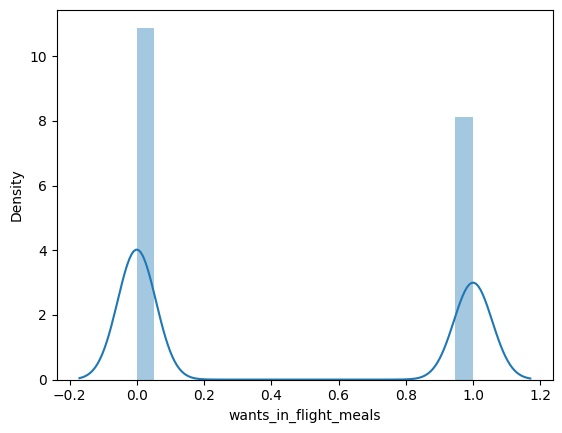


flight_duration:
-0.36007973284442907


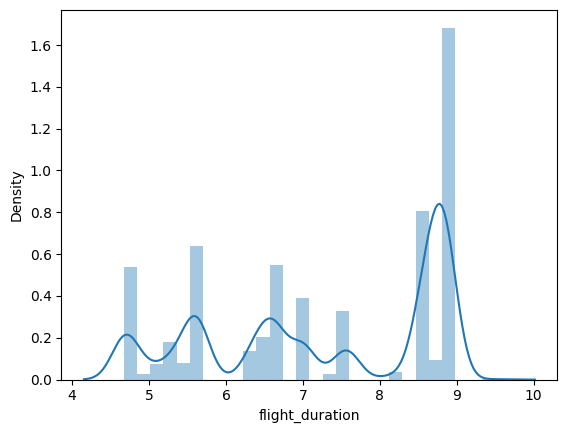


booking_complete:
1.965292192418646


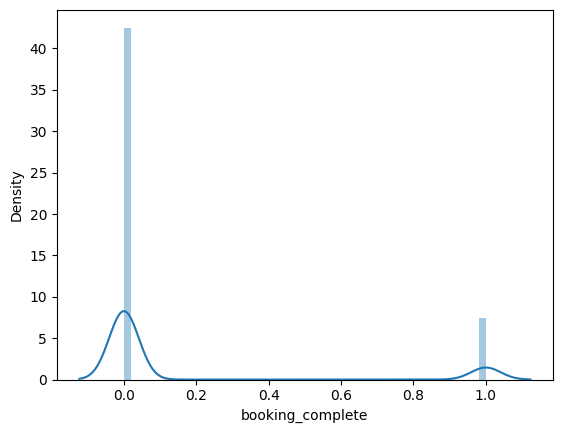

In [15]:
for i in df_n:
    print(i,':',sep='')
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()
    print()

- Columns length_of_stay, num_passengers, booking_complete, purchase_lead are highly positively skewed
- Rest are positively/slightly positively skewed or negatively/slightly negatively skewed

sales_channel:


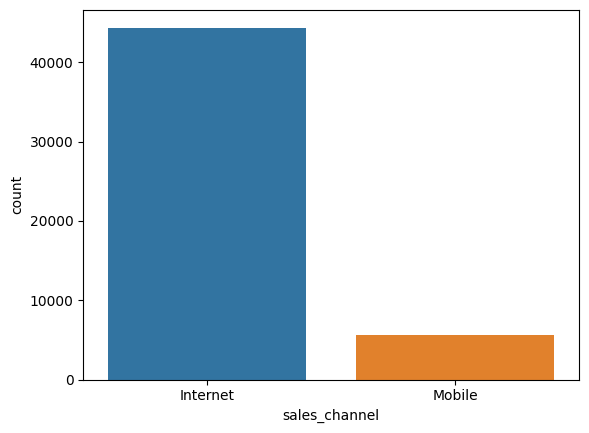


trip_type:


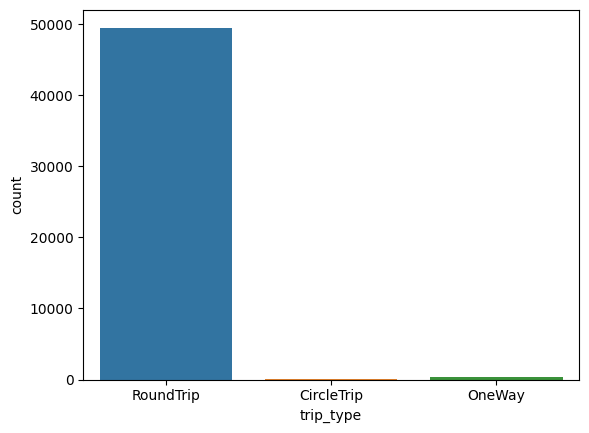

In [16]:
for i in df_c:
    if((df[i].nunique() < 10) == True):
        print(i,':',sep='')
        sns.countplot(x=df[i])
        plt.show()
        print()

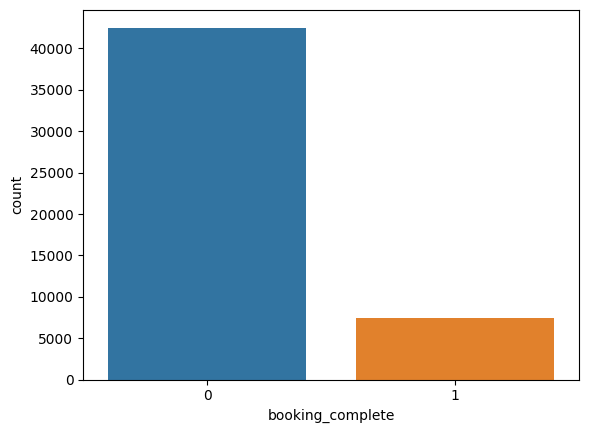

0    85.044
1    14.956
Name: booking_complete, dtype: float64


In [17]:
sns.countplot(x=df['booking_complete'])
plt.show()
print(df['booking_complete'].value_counts(normalize=True)*100)

- Target Variable is highly imbalanced (0 = ~85%, 1 = ~15%)
- As it is highly imbalanced, tree based models will be used (Base model - Decision Tree, Advanced model - Random Forest)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [19]:
x= df.drop('booking_complete',axis=1)
y= df['booking_complete']

x.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [20]:
for i in df_c:
    x[i],_ = x[i].factorize()
    
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

### Model Building

In [21]:
from sklearn.model_selection import train_test_split

import scipy.stats as stats


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, cohen_kappa_score, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score 

from sklearn.feature_selection import RFE

In [22]:
from sklearn.model_selection import train_test_split

xtrain_dt,xtest_dt,ytrain_dt,ytest_dt = train_test_split(x,y,test_size=0.30,random_state=15)
xtrain_dt.shape,xtest_dt.shape,ytrain_dt.shape,ytest_dt.shape

((35000, 13), (15000, 13), (35000,), (15000,))

#### Statistically proving train & test are good representations of overall data 
* A ttest independence need to be done on each column to show both have similar representations.
* Null Hypothesis : Both sets have same mean , thus have equal representation.
* Alternate Hypothesis : Both sets have unequal means , thus unequal representation.

In [23]:
tstats,pvals = stats.ttest_ind(xtrain_dt, xtest_dt)
ref_df = pd.DataFrame(pvals,index=xtrain_dt.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

- As all the columns have pvalues greater than significance level of 0.05, we do not reject the null hypothesis, thus accepting it
- This concluding that all independent features are properly represented both in train and test sets.

### Model 1 - Decision Tree

In [24]:
dt = DecisionTreeClassifier(random_state=15)
dt.fit(xtrain_dt, ytrain_dt)

ypred_dt = dt.predict(xtest_dt)

In [25]:
print(classification_report(ytest_dt, ypred_dt))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12721
           1       0.30      0.33      0.31      2279

    accuracy                           0.78     15000
   macro avg       0.59      0.60      0.59     15000
weighted avg       0.79      0.78      0.78     15000



In [26]:
model_evaluation = pd.DataFrame(columns=['test_accuracy', 'test_precision', 'test_recall', 'test_kappa', 'f1_score', 'roc_auc_score'])

model_evaluation.loc['Decision_Tree'] = [accuracy_score(ytest_dt, ypred_dt), precision_score(ytest_dt, ypred_dt), 
                                        recall_score(ytest_dt, ypred_dt), cohen_kappa_score(ytest_dt, ypred_dt), 
                                        f1_score(ytest_dt, ypred_dt), roc_auc_score(ytest_dt, ypred_dt)]
model_evaluation

,test_accuracy,test_precision,test_recall,test_kappa,f1_score,roc_auc_score
Decision_Tree,0.780533,0.298928,0.330408,0.183645,0.313881,0.595791


In [27]:
dt_featureimp = pd.DataFrame(dt.feature_importances_,index=xtrain_dt.columns,columns = ['Decision_Tree'])
dt_featureimp

,Decision_Tree
num_passengers,0.047269
sales_channel,0.015464
trip_type,0.001913
purchase_lead,0.226957
length_of_stay,0.117654
flight_hour,0.147923
flight_day,0.085640
route,0.147928
booking_origin,0.104827
wants_extra_baggage,0.015517


#### RFE - Recursive Feature Elimination

In [28]:
dt_rfe = RFE(estimator = dt, n_features_to_select = 8)
rfe_model = dt_rfe.fit(xtrain_dt, ytrain_dt)
feat_index = pd.Series(data = rfe_model.ranking_, index = xtrain_dt.columns)

In [29]:
significant_feat_rfe = feat_index[feat_index==1].index
significant_feat_rfe

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'flight_duration'],
      dtype='object')

### Model 2 - Random Forest

In [30]:
from sklearn.model_selection import train_test_split

xtrain_rf,xtest_rf,ytrain_rf,ytest_rf = train_test_split(x[significant_feat_rfe],y,test_size=0.30,random_state=15)
xtrain_rf.shape,xtest_rf.shape,ytrain_rf.shape,ytest_rf.shape

((35000, 8), (15000, 8), (35000,), (15000,))

In [31]:
tstats,pvals = stats.ttest_ind(xtrain_rf, xtest_rf)
ref_df = pd.DataFrame(pvals,index=xtrain_rf.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

- As all the columns have pvalues greater than significance level of 0.05, we do not reject the null hypothesis, thus accepting it
- This concluding that all independent features are properly represented both in train and test sets.

In [32]:
rf = RandomForestClassifier(random_state=15)
rf.fit(xtrain_rf, ytrain_rf)

ypred_rf = rf.predict(xtest_rf)

In [33]:
print(classification_report(ytest_rf, ypred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12721
           1       0.51      0.10      0.17      2279

    accuracy                           0.85     15000
   macro avg       0.68      0.54      0.55     15000
weighted avg       0.81      0.85      0.80     15000



In [34]:
model_evaluation.loc['Random_Forest'] = [accuracy_score(ytest_rf, ypred_rf), precision_score(ytest_rf, ypred_rf), 
                                        recall_score(ytest_rf, ypred_rf), cohen_kappa_score(ytest_rf, ypred_rf), 
                                        f1_score(ytest_rf, ypred_rf), roc_auc_score(ytest_rf, ypred_rf)]
model_evaluation

,test_accuracy,test_precision,test_recall,test_kappa,f1_score,roc_auc_score
Decision_Tree,0.780533,0.298928,0.330408,0.183645,0.313881,0.595791
Random_Forest,0.848667,0.509595,0.104871,0.128762,0.173945,0.543395


In [35]:
xtrain_rf.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'flight_duration'],
      dtype='object')

In [36]:
rf_featureimp = pd.DataFrame(rf.feature_importances_,index=xtrain_rf.columns,columns = ['RF-Feature_Importance'])
rf_featureimp = rf_featureimp.sort_values('RF-Feature_Importance',ascending=False)
rf_featureimp

,RF-Feature_Importance
purchase_lead,0.225772
route,0.160726
flight_hour,0.154482
length_of_stay,0.133854
booking_origin,0.110293
flight_day,0.095916
flight_duration,0.068891
num_passengers,0.050066


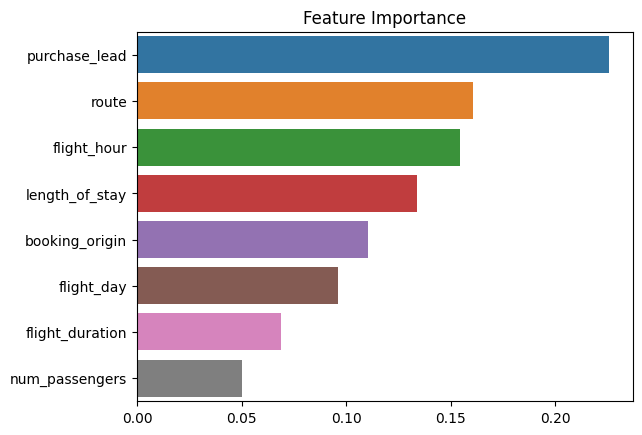

In [37]:
sns.barplot(data = rf_featureimp,x='RF-Feature_Importance',y=rf_featureimp.index).set(xlabel=None,title='Feature Importance')
plt.show()

## Findings

Primary metric to be looked at in this case will be Percision (correctly predicted positives out of all predicted positives) as it focuses on false positives (FP), which means that a customer is predicted to have booked a ticket but in reality has not booked one

1.Percision has greatly increased from Decision Tree model to Random Forest model after RFE was done.
- That means the correctly predicted positives out of all predicted positives has increased
<br>

2.The 8 features chosen are: purchase_lead, route,flight_hour, length_of_stay, booking_origin
- These are the most important features to look out for